In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_parquet("AAPL_5y.parquet")

In [3]:
df.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [5]:
df['Date'].value_counts()

Date
2020-08-07 00:00:00-04:00    1
2023-11-30 00:00:00-05:00    1
2023-12-11 00:00:00-05:00    1
2023-12-08 00:00:00-05:00    1
2023-12-07 00:00:00-05:00    1
                            ..
2022-04-05 00:00:00-04:00    1
2022-04-04 00:00:00-04:00    1
2022-04-01 00:00:00-04:00    1
2022-03-31 00:00:00-04:00    1
2025-08-07 00:00:00-04:00    1
Name: count, Length: 1256, dtype: int64

In [6]:
df['Symbol'].value_counts()

Symbol
AAPL    1256
Name: count, dtype: int64

In [15]:
df.dropna(inplace=True)

In [24]:
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))


In [26]:
window = 21  # e.g., 1 month
df['rolling_vol'] = df['log_return'].rolling(window).std() * np.sqrt(252)

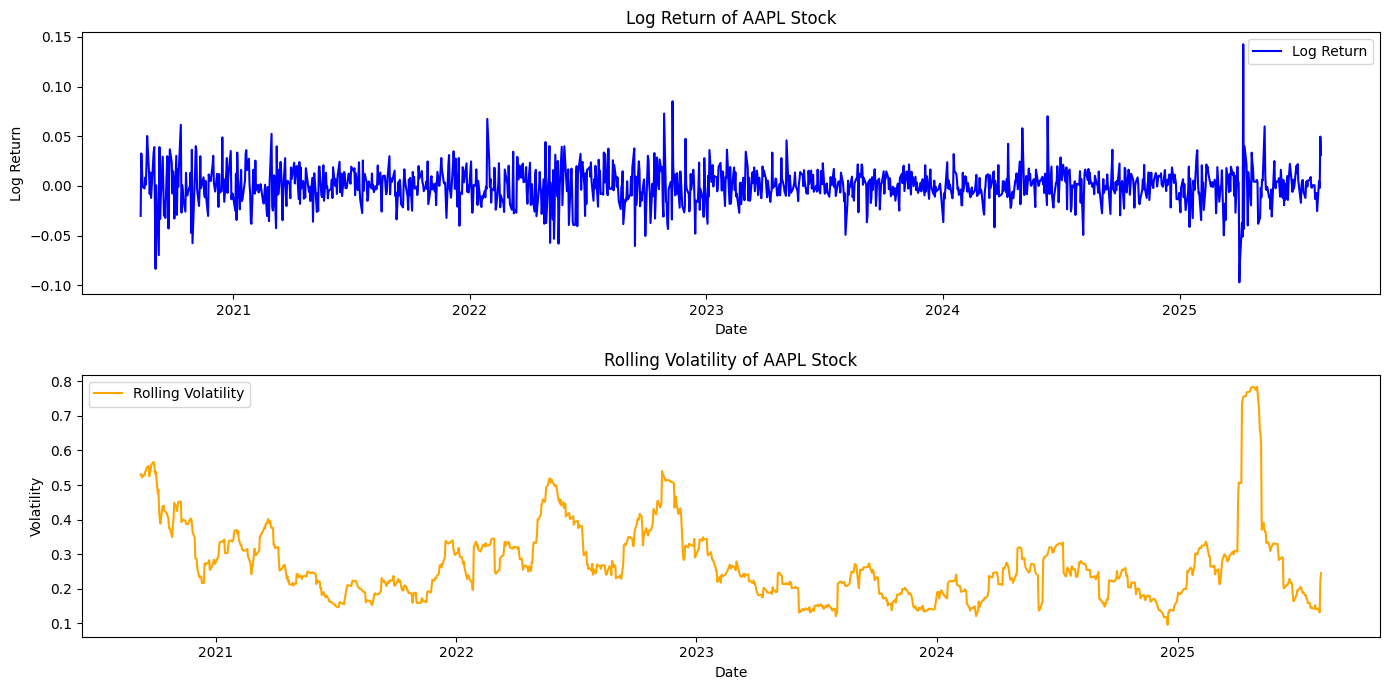

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['Date'],df['log_return'], label='Log Return', color='blue')
plt.title('Log Return of AAPL Stock')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(df['Date'], df['rolling_vol'], label='Rolling Volatility', color='orange')
plt.title('Rolling Volatility of AAPL Stock')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()